In [ ]:
# ---------------------------------------------------------------------------------------
# Author: Luis Starlino
# DateTime: 21/07/2025 - 20:00 PM 
# Description: Preparing the data for the Neutral Network
# ---------------------------------------------------------------------------------------

In [1]:
# --- Import dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Load csv
df = pd.read_csv("transacoes_fraude_preprocessado.csv")
df.head()


,Valor da Transação,Classe(transações anteriores),Classe (rótulo),Recorrência de envios do mesmo valor,Idade do titular do cartão,Classe(cartão temporário),Limite de crédito,Classe(nome lista devedores),Número de cartões complementares,Numero transações para outro pais,...,Dispositivo de acesso novo?,Hora da Transação,Dias desde criação da conta,Dias desde ativação cartão,Segundos desde última transação,Latitude,Longitude,pagamento_atrasado,pagamento_bom,pagamento_inadimplente
0,140.78,0,1,0,35,0,20000,0,4,0,...,0,5,1156,1102,975850.0,25.096824,-170.996128,False,True,False
1,50.89,1,0,0,75,1,1000,0,5,5,...,0,10,2902,2848,1411779.0,11.024111,77.767061,False,True,False
2,17.95,1,0,1,23,1,20000,0,3,8,...,0,13,3501,3491,2421590.0,-73.305748,-145.182104,False,False,True
3,6.24,1,1,0,47,0,10000,1,3,5,...,1,7,963,882,878736.0,36.822931,-163.503222,True,False,False
4,535.93,0,0,0,38,1,10000,1,5,8,...,0,2,322,234,234620.0,36.327656,66.077160,False,False,True


In [2]:
# --- OUTPUT (y) x INPUTS(x) SEGREGATION

y = df['Classe (rótulo)']
X = df.drop(columns=["Classe (rótulo)"])

In [3]:
# --- TRAIN AND TEST SPLIT (20% for test and 80% for training)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training Size: {X_train.shape}")
print(f"Test Size: {X_test.shape}")


Training Size: (4000, 22)
Test Size: (1000, 22)


In [5]:
# --- Data normalization
# --- This is import because the neutral network works better with between -1 and 1 or 0 and 1;
scaler = StandardScaler()

# Adjust in training and apply to both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[ 3.02544698  1.00954556  0.981668   ... -0.69428408 -0.70617891
   1.38707484]
 [-0.43277749 -0.9905447   0.981668   ...  1.44033261 -0.70617891
  -0.72094163]
 [-0.81600708  1.00954556  0.981668   ... -0.69428408  1.41607175
  -0.72094163]
 ...
 [-0.68014946 -0.9905447  -1.01867434 ... -0.69428408  1.41607175
  -0.72094163]
 [-0.85994616  1.00954556  0.981668   ...  1.44033261 -0.70617891
  -0.72094163]
 [ 1.20882695  1.00954556  0.981668   ... -0.69428408 -0.70617891
   1.38707484]]


In [6]:
# --- Install Tensor Flow (run just one time)
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/332.0 MB 11.7 MB/s eta 0:00:29
    --------------------------------------- 4.7/332.0 MB 11.6 MB/s eta 0:00:29
    --------------------------------------- 7.1/332.0 MB 11.6 MB/s eta 0:00:28
   - -------------------------------------- 9.7/332.0 MB 11.6 MB/s eta 0:00:28
   - -------------------------------------- 12.1/332.0 MB 11.6 MB/s eta 0:00:28
   - -------------------------------------- 14.4/332.0 MB 11.6 MB/s eta 0:00:28
   -- ------------------------------------- 17.0/332.0 MB 11.6 MB/s eta 0:00:28
   -- ------------------------------------- 19.4/332.0 MB 11.6 MB/s eta 0:00:27
   -- ------------------------------------- 22.0/332.0 MB 11.6 MB/s eta 0:00:27
   -- ------------------------------------- 24.4/332.0 MB 11.6 MB/s eta 0:00:27
   --- ------------------------------------ 26.7/332.0 MB 11.6 MB/s eta 0:00:27
   --- ------------------------------------ 29.4/332.

In [6]:
# --- Build MLP model (Imports)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# --- 1. DEFINE MODEL
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária
])

In [8]:
# --- 2. COMPILATION
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# --- 3. EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [10]:
# --- 4. Training
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.4106 - val_accuracy: 0.9200 - val_loss: 0.3020
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3385 - val_accuracy: 0.9200 - val_loss: 0.2970
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3314 - val_accuracy: 0.9200 - val_loss: 0.2957
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3271 - val_accuracy: 0.9200 - val_loss: 0.2959
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3236 - val_accuracy: 0.9200 - val_loss: 0.2951
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3203 - val_accuracy: 0.9200 - val_loss: 0.2960
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3178 - val_accuracy: 0.9200 - val_loss: 0.2944
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8981 - loss: 0.3155 - val_accu

In [12]:
# --- Evaluation
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\n✅ Test Accuracy: {accuracy:.4f}')



✅ Test Accuracy: 0.9030


In [13]:
# --- Forecasts and metrics
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       903
           1       0.00      0.00      0.00        97

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.82      0.90      0.86      1000


--- Confusion Matrix ---
[[903   0]
 [ 97   0]]


C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


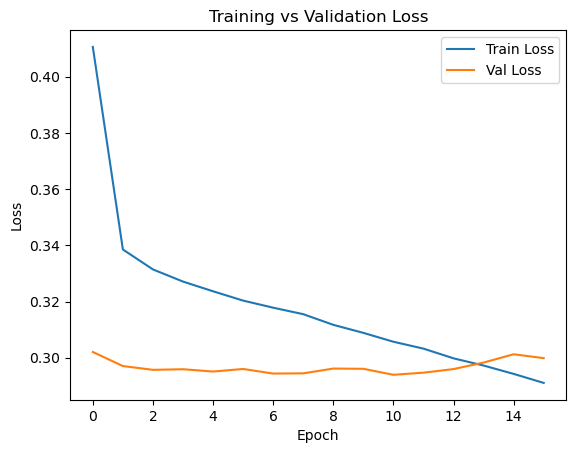

In [14]:
# --- Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [15]:
# Save the MLP model 
model.save('ai.keras')

print("\n✅ Modelo salvo com sucesso!")


✅ Modelo salvo com sucesso!
